# Bayesian Statistics
Probability expresses a degree of belief in an event. The degree of belief may be based on prior knowledge about the event, such as the results of previous experiments, or on personal beliefs about the event.

* The use of random variables, or more generally unknown quantities, to model all sources of uncertainty in statistical models including uncertainty resulting from lack of information.

* The need to determine the prior probability distribution taking into account the available (prior) information.

* The sequential use of Bayes' formula: when more data become available, calculate the posterior distribution using Bayes' formula; subsequently, the posterior distribution becomes the next prior.

* While for the frequentist a hypothesis is a proposition (which must be either true or false), so that the frequentist probability of a hypothesis is either 0 or 1, in Bayesian statistics the probability that can be assigned to a hypothesis can also be in a range from 0 to 1 if the truth value is uncertain.

__Fundaments__
* Bayes' Theorem

__The Role of Probability__
* objectivists interpretation is an extension of logic. Probability quantifies the reasonable expectation everyone (even a "robot") sharing the same knowledge should share in accordance with the rules of Bayesian statistics (Cox's theorem).
* subjectivists, probability corresponds to a personal belief. Rationality and coherence allow for substantial variation within the constraints they pose (Dutch book argument or by the decision theory and de Finetti's theorem).

The objective and subjective variants of Bayesian probability differ mainly in their interpretation and construction of the prior probability. 


# Probability
__(Fair) Coin Tossing.__ 
The probability of an event $A$ is $p(A)$. For example a probabilistic description of the (fair) coin tossing problem provides the probability for head $p(\mathrm{Head})$ and the probability for tail $p(\mathrm{Tail})$
$$p(\mathrm{Head})=\frac{1}{2}\,,$$
$$p(\mathrm{Tail})=\frac{1}{2}\,,$$
or in a compact way
$$p(\{\mathrm{Head},\mathrm{Tail}\})=\{\frac{1}{2},\frac{1}{2}\}\,.$$

In the case when the probability is normalized
$$\mathrm{(continuous)}\int_A^{}p(A)\mathrm{d}A=1\,,\qquad (\mathrm{discrete})\sum_i^{}p(A_i^{})=1\,$$
it says that the probability is a density, i.e. probability density function, otherwise it is called a probability mass function.
***
Let's have a look on how to sample probabilities in Python, and resuming statistics. Basically we need two libraries

In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import sys
print(sys.version)


3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]


**`numpy.random`**: for random number generation

**`matplotlib.pyplot.hist`**: histogram plotting

In [28]:
# a coin has head and tail
coin = ["Head", "Tail"]

# draw a sample from coin with equal probability for Head and Tail
sample = np.random.choice(coin, size=10000, replace=True)

# print the first twenty outcomes
print(sample[1:20])

# count the occurences of head
head_count = sum(sample=='Head')
# ... and tail
tail_count = sum(sample=='Tail')

# print the statistics
print([head_count/len(sample), tail_count/len(sample)])

# plot the statistics
plt.hist(sample)
plt.show()

['Tail' 'Tail' 'Tail' 'Tail' 'Head' 'Tail' 'Tail' 'Tail' 'Tail' 'Head'
 'Head' 'Tail' 'Head' 'Tail' 'Head' 'Head' 'Head' 'Head' 'Head']
[0.4988, 0.5012]


__Unfair Coin Tossing.__ In this case, the coin has still "Head" and "Tail". However, the relative probability is no more $\frac{1}{2}$, it can be for example

$$p(\{\mathrm{Head},\mathrm{Tail}\})=\{h,1-h\}\,.$$

Probability of choice is provided by the kwarg `p=[]` in `numpy.random.choice`. The kwarg must be normalized, i.e. `sum(p)=1`.

In [3]:
# draw an unfair sample with p({"Head", "Tail"})={0.7, 0.3}
h = 0.7
unfair_sample = np.random.choice(coin, size=1000, replace=True, p=[h, 1-h])

# plot the statistics
plt.hist(unfair_sample)
plt.show()


__Coin Tossing.__ The probability `p` of having `k` `Head`'s (successes) for `n` launches (trials) is

$$
\mathrm{binomial}(k;n,p)={n\choose k}p^k_{}(1-p)^{n-k}_{}\,,\qquad k\leq n
$$

this is a probability (not a density, it is not normalized).

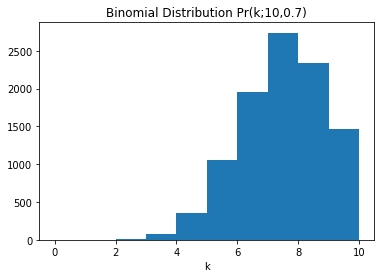

In [20]:
n = 10
p = 0.7

x = np.random.binomial(n, p, 10000)
plt.hist(x, bins=np.arange(0, n+1e-12, 1))
plt.title(f"Binomial Distribution Pr(k;{n},{p})")
plt.xlabel("k")
plt.show()


__Continuous Probabilities.__ The tossing coin problem is an example of discrete probability. That is the outcomes of the _experiment_ occur in a finite number of different possibilities, in the above illustrated case there are two possibilities either Head or Tail. In a number of applications it's however request to give a probabilistic description of continuous states, that is the probability spans a set of continuous variable. This is the case when a measurement process is performed. The different measurements span continuous values. Typically they are distributed according to a normal distribution

$$p(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi\,\sigma^2_{}}}\exp\left[-\frac{(x-\mu)^2}{2\,\sigma^2_{}}\right]\,,$$

where $\mu$ is the distribution mean and $\sigma$ is the distribution standard deviation. As here written the normal distribution is a probability density.


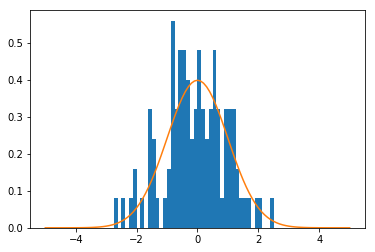

distribution: mean = 0.000000, standard deviation= 1.000000 
sample:       mean = -0.075702, standard deviation= 1.019219
hpdi : (-1.959963984540054, 1.959963984540054)


In [21]:
# the normal pdf is in scipy
from scipy.stats import norm

# distribution mean
mu = 0.

# distribution std
sigma = 1.

# samples size
samples = 100

# the samples is drawn from a random normal distribution
X = np.random.normal(mu, sigma, samples)

# support for the PDF (for plotting)
x = np.linspace(mu-5.*sigma, mu+5.*sigma, 101)

# plot the histogram
plt.hist(X, bins=np.arange(mu-5.*sigma, mu+5.*sigma, 0.125*sigma), density=True)

# plot the PDF
plt.plot(x, norm.pdf(x, mu, sigma))
plt.show()

# compute the sample mean
mean = np.mean(X)

# compute the sample std dev
std = np.std(X)

# compute the high probability density interval (95%)
hpdi = norm.interval(0.95, loc=mu, scale=sigma)

print("distribution: mean = %f, standard deviation= %f " % (mu, sigma))
print("sample:       mean = %f, standard deviation= %f" % (mean, std))
print("hpdi : %s" % str(hpdi))

# Probabilities for two events
In statistics is often of interest to establish the *connection* between the occurrence of two events $A$ and $B$ (the simultaneous observation) the observation of $A$ when $B$ is observed (and viceversa).

__Marginals__.

* probability that $A$ occurs: $p(A)=\int_B^{}p(A,B)\mathrm{d}B$
* probability that $B$ occurs: $p(B)=\int_A^{}p(A,B)\mathrm{d}A$

__Cojoint Probability__.
* probability that $A$ and $B$ occur: $p(A,B)=p(B,A)$

__Conditionals__.
* probability that $A$ occur, given $B$: $p(A\,|\,B)$
* probability that $B$ occur, given $A$: $p(B\,|\,A)$


# Bayes's Theorem
In the context of Bayes's Theorem the following jargon is adopted
* $p(A)$ is the __prior__
* $p(B\,|\,A)$ is the __likelihood__
* $p(B\,|\,A)\,p(A)$ is the __posterior__ (probability mass function, pmf)

Bayes's Theorem is the result of a simple algebraic manipulation for the probability of events $A$ and $B$ occurring simultaneously. It has indeed

$$p(A,B)=p(B,A)\,.$$

Since $p(A,B)=p(A\,|\,B)\,p(B)$ and $p(B,A)=p(B\,|\,A)\,p(A)$, equating these two formulae it has

$$p(A\,|\,B)=\frac{p(B\,|\,A)\,p(A)}{p(B)}\,,$$

but since $p(B)=\int p(B\,|\,A)\,p(A)\,\mathrm{d}A$, it results

$$p(A\,|\,B)=\frac{p(B\,|\,A)\,p(A)}{\int p(B\,|\,A)\,p(A)\,\mathrm{d}A}\,,$$

__Dyachronic Interpretation.__ Rewritten in terms of Hypothesis and Data (observations)

$$p(H\,|\,D)=\frac{p(D\,|\,H)\,p(H)}{\int p(D\,|\,H)\,p(H)\,\mathrm{d}H}\,.$$

Our initial guess (the probability for the hypothesis $p(H)$) is corrected/changed given that we observed an outcome $D$ under the hypothesis $H$. The probability of observing $D$ given the hypothesis is $p(D\,|\,H)$.


__Problem.__ Ola has two boxes, let's say $\mathrm{Box}_1^{}$ and $\mathrm{Box}_2^{}$. In $\mathrm{Box}_1^{}$ there are $10$ apples and $30$ bananas. In $\mathrm{Box}_2^{}$ there are $20$ apples and $20$ bananas. Ola picks a random box, then from that box he picks a random fruit. The latter is a banana. Did Ola picked the fruit from $\mathrm{Box}_1^{}$ or $\mathrm{Box}_2^{}$? What is the probability that Ola picked from $\mathrm{Box}_1^{}$ (or $\mathrm{Box}_2^{}$)?

__Solution.__ Bayes's Theorem

$$p(\mathrm{Box}\,|\,\mathrm{Fruit})=\frac{p(\mathrm{Fruit}\,|\,\mathrm{Box})\,p(\mathrm{Box})}{
\sum_i^{} p(\mathrm{Fruit}\,|\,\mathrm{Box}_i)\,p(\mathrm{Box}_i)}\,.$$

* prior $p(\mathrm{Box})$, where $\mathrm{Box}=\mathrm{Box}_1,\mathrm{Box}_2$
* likelihood $p(\mathrm{Fruit}\,|\,\mathrm{Box})$, where $\mathrm{Fruit}=\mathrm{Apple}, \mathrm{Banana}$
 and $\mathrm{Box}=\mathrm{Box}_1,\mathrm{Box}_2$
* posterior $p(\mathrm{Box}\,|\,\mathrm{Fruit})\propto p(\mathrm{Fruit}\,|\,\mathrm{Box})\,p(\mathrm{Box})$
* data marginal $p(\mathrm{Fruit})=\sum_{i}p(\mathrm{Fruit}\,|\,\mathrm{Box}_i)\,p(\mathrm{Box}_i)$

Tableau for $\mathrm{Fruit}=\mathrm{Banana}$

|   |Prior|Likelihood|Posterior Pmf|Posterior|
|---|---|---|---| |
|Box|   |   |   | |
| 1 |1/2|3/4|3/8|3/5|
| 2 |1/2|2/4|2/8|2/5|
| | | | | |
| | |Data Marginal|5/8| |




## Implementing with Dictionaries and Functions.
The Data store raw quantities (absolute numbers, and pmfs). The Functions yield the probability densities.

**Data**
* tuple/list for fruit names: `apple, banana`
* tuple/list for box names: `box1, box2`
* dictionary for boxes' data: `keys = fruit names, values = fruit numbers`
* prior: `keys = box names, values = probabilities`
* likelihood: `keys = box names, values = boxes data`
* posterior: `keys = fruit names, values = likelihood[box][fruit]*prior[box]`

In [3]:
# a bit of data structures
fruit_name = ('apple', 'banana')
box_name = ('box1', 'box2')
box1_data = dict(zip(fruit_name, (10., 30.)))
box2_data = dict(zip(fruit_name, (20., 20.)))

# probability mass functions
prior_data = dict(zip(box_name, (1., 1.)))
likelihood_data = dict(zip(box_name, (box1_data, box2_data)))
posterior_data = {
    fruit: {box:likelihood_data[box][fruit]*prior_data[box] for box in box_name}
        for fruit in fruit_name}

print("\ndata structures\n")
print("box1_data = %s " % str(box1_data))
print("box2_data = %s" % str(box2_data))
print("prior_data = %s " % str(prior_data))
print("likelihood_data = %s " % str(likelihood_data))
print("posterior_data = %s " % str(posterior_data))



data structures

box1_data = {'apple': 10.0, 'banana': 30.0} 
box2_data = {'apple': 20.0, 'banana': 20.0}
prior_data = {'box1': 1.0, 'box2': 1.0} 
likelihood_data = {'box1': {'apple': 10.0, 'banana': 30.0}, 'box2': {'apple': 20.0, 'banana': 20.0}} 
posterior_data = {'apple': {'box1': 10.0, 'box2': 20.0}, 'banana': {'box1': 30.0, 'box2': 20.0}} 


In [6]:
# functions to extract the PDFs
def prior(box):
	return prior_data[box]/sum(prior_data.values())

def likelihood(fruit, box):
	return likelihood_data[box][fruit]/sum(likelihood_data[box].values())

def posterior(box, fruit):
	return posterior_data[fruit][box]/sum(posterior_data[fruit].values())

print("\nPDFs")
print("p(apple|box) = %s " % str([likelihood('apple', box) for box in box_name]))
print(f"p(banana|box) = {[likelihood('banana', box) for box in box_name]}")
print(f"p(box|apple) = {[posterior(box, 'apple') for box in box_name]}")
print(f"p(box|banana) = {[posterior(box, 'banana') for box in box_name]}")



PDFs
p(apple|box) = [0.25, 0.5] 
p(banana|box) = [0.75, 0.5]
p(box|apple) = [0.3333333333333333, 0.6666666666666666]
p(box|banana) = [0.6, 0.4]


__Conclusions.__
* If Ola picked an _apple_ it is most likely he picked from box 2: $p(\{\mathrm{Box}_1,\mathrm{Box}_2\}\,|\,\mathrm{apple})  = \{0.333, 0.666\}$. Which makes sense since there are more apple/fruit in the second box.
* If Ola picked a _banana_ it is most likely he picked from box 1: $p(\{\mathrm{Box}_1,\mathrm{Box}_2\}\,|\,\mathrm{banana}) = \{0.600, 0.400\}$. Which makes sense since there are more banana/fruit in the first box.

# Conjugate Prior
Through the Bayes's Theorem one has the opportunity of updating his/her beliefs (hypothesis) while he/she observes the outcomes of a random process. This updating process can be efficiently encoded by using the concept or **Conjugate Prior**.

A conjugate prior is a posterior which belongs to the same family of distributions of the prior.


In [22]:
n = 10
p = 0.7

x = np.random.binomial(n, p, 10000)
plt.hist(x, bins=np.arange(0, 10+1e-12, 1))
plt.title(f"Binomial Distribution Pr(k;{n},{p})")
plt.xlabel("k")
plt.show()

Let's consider we are at a point where we had $k$ Heads (successes) for $n$ tossing (trials). A further coin tossing (one more trial) $n\rightarrow n+1$ can give two outcomes:

* failure (Tail)

$$
\mathrm{binomial}(k;n+1,p)={n+1\choose k}p^k_{}(1-p)^{n+1-k}_{}\propto (1-p)\,\mathrm{binomial}(k;n,p)
$$

* success (Head)

$$
\mathrm{binomial}(k+1;n+1,p)={n+1\choose k+1}p^{k+1}_{}(1-p)^{n+1-k-1}_{}\propto p\,\mathrm{binomial}(k;n,p)
$$

therefore the Binomial prior becomes a Binomial posterior when it is multiplied by the likelihood

$$
\mathrm{Bernoulli}(h=\{0,1\};p)=\left\{\begin{array}{cc}
(1-p)\,, & h=0 \\
p\,, & h=1
\end{array}\right.
$$

where $h=0$ stands for failure (Tail), while $h=1$ stands for success (Head).


In [26]:
# update of the posterior with prior
#%reset # apply a reset if variables are a messy

import numpy as np
import matplotlib.pyplot as plt

# the coin
coin = ['Head', 'Tail']

# support for plotting the functions
p = np.linspace(0, 1, 1001)

# store the prior, initially is assumed as uniform
prior = 1+0*p

# define the likelihood
def likelihood(k, p):
    if k=='Tail':
        return 1-p # bernoulli distribution with h=0 (Tail)
    else:
        return p # bernoulli distribution with h=1 (Head)

n = 10
for i in range(n):
    toss = np.random.choice(coin, p=[0.7, 0.3])
    prior = likelihood(toss, p)*prior
    prior /= max(prior)

plt.plot(p, prior)
plt.show()
print(f"Maximum Likelihood at p = {p[np.argmax(prior)]}")


Maximum Likelihood at p = 0.8
